In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

dF_stores=pd.read_csv('stores.csv')
dF_products=pd.read_csv('products.csv')
dF_customers=pd.read_csv('customers.csv')
dF_tickets=pd.read_csv('tickets.csv')

data = dF_tickets.merge(dF_customers, on="customerid", how = 'inner')
#data = data.merge(dF_products, on="productid", how = 'inner')
#data = data.merge(dF_stores, on="storeid", how = 'inner')

data['datekey']=pd.to_datetime(dF_tickets['datekey'],format="%Y-%m-%d")
data['weekday'] = data['datekey'].apply(lambda x: dt.datetime.strftime(x, '%A'))
tickets = pd.DataFrame(data.groupby('ticketid')['extendedamount'].sum())
tickets = tickets.merge(data[['ticketid', 'age', 'gender', 'customerid']], on="ticketid", how = 'inner').drop_duplicates()

In [10]:
tickets.head()

,ticketid,extendedamount,age,gender,customerid
0,100002631201903141011,12.94,63.0,F,77340000000249293
6,100002631201903141014,22.37,49.0,F,77340000000022507
22,100002631201903141017,25.53,NaN,NaN,77000000086087334
38,100002631201903141020,29.29,24.0,F,77000000177655528
68,100002631201903141032,4.33,37.0,F,77340000000159762


In [31]:
total_compras = tickets.customerid.value_counts()
total_compras

77000000052074769    80
77000000187324488    51
77340000000479862    47
77340000000031722    40
77340000000595971    38
77340000001815358    37
77000000161689813    37
77340000012617957    35
77000000050079576    33
77340000011021822    32
77340000012267205    32
77340000000232415    31
77340000000067127    30
77340000025053357    30
77340000000009606    30
77340000001733296    29
77340000001705651    29
77340000012962113    29
77340000000769698    29
77340000000082938    29
77000000186450421    29
77000000087086240    28
77340000001708852    28
77000000091089139    28
77000000077353357    28
77340000012378755    28
77340000010227198    28
77340000001897711    28
77340000000019597    28
77340000001246938    27
                     ..
77340000023901579     1
77000000109909176     1
77340000019812932     1
77340000000868638     1
77340000011487519     1
77000000051814033     1
77000000122568549     1
77340000019571402     1
77000000194782430     1
77340000017036016     1
7700000028316853

In [33]:
gasto_total = tickets.groupby('customerid')['extendedamount'].sum().sort_values(ascending=False)
gasto_total

customerid
77000000052074769    2594.00
77340000001923028    2314.81
77340000011101071    1728.14
77340000000647284    1284.12
77340000012962113    1061.12
77340000010550014    1058.31
77340000000479862    1011.13
77340000011574916     998.85
77340000010980791     852.84
77000000197614733     845.40
77000000187324488     758.54
77340000013463409     746.30
77340000000173439     740.73
77340000000845358     735.21
77340000000051898     732.09
77340000000097876     727.20
77340000000357545     724.02
77000000201673989     717.40
77340000000103017     702.21
77340000001782281     702.03
77340000000031722     693.25
77340000014975251     686.21
77340000001830490     685.49
77340000001544728     680.95
77340000011981540     676.78
77340000025516338     673.90
77000000137977581     670.62
77000000193559163     658.59
77000000126753517     658.35
77340000000347748     655.27
                      ...   
77340000011806164       1.28
77340000001528335       1.20
77000000050650615       1.19
773

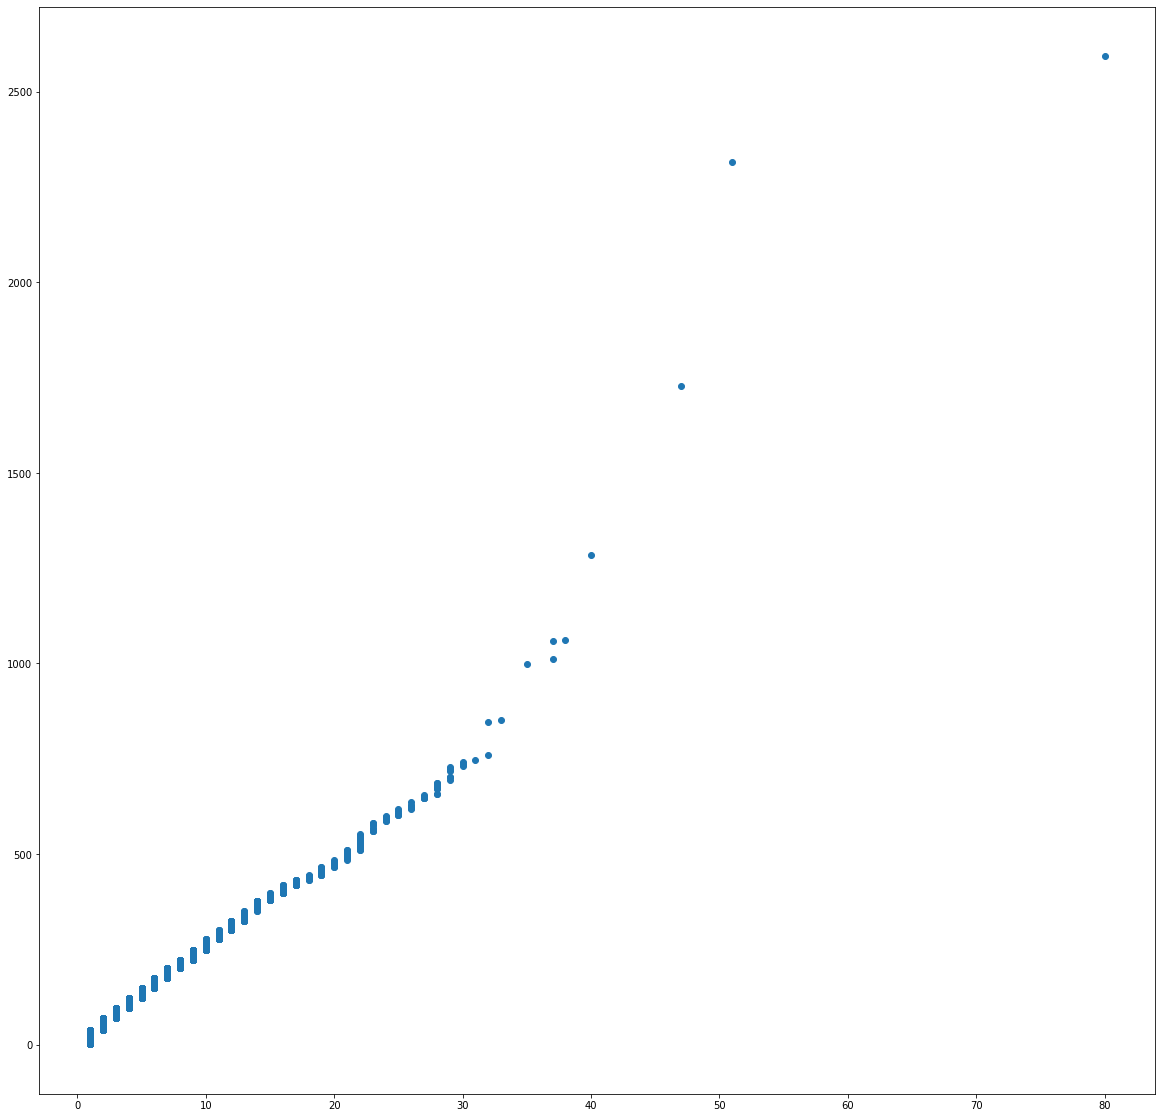

In [29]:
plt.rcParams['figure.figsize'] =[20, 20]
plt.scatter(total_compras, gasto_total, cmap='rainbow')